<a href="https://colab.research.google.com/github/guimaraaes/data-science/blob/master/kaggle_titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [60]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
%matplotlib inline
from pandas.plotting import scatter_matrix
import warnings
warnings.filterwarnings('ignore') 

#DESCRIÇÃO DA PROBLEMÁTICA
Esse notebook consiste em descrever os dados do naufrágio do Titanic e com Machine Learning (ML) predizer se os passageiros no DataFrame de teste vão sobreviver ou não. No database do Kaggle temos,

> Preveja a sobrevivência no Titanic e familiarize-se com os fundamentos do ML

As variáveis do banco de dados analisado no arquivo *train.csv* e *test.csv* são:
*   **survival**: sobrevivência; 
*   **pclass**: tipo de classe de embarque; 
*   **sex**: sexo; 
*   **Age**: idade; 
*   **sibsp**: número de irmão ou conjuguês a bordo; 
*   **parch**: número de parentes/crianças a bordo; 
*   **ticket**: número do tiket; 
*   **fare**: taxa paga pelo passgeiro; 
*   **cabin**: cabine; 
*   **embarked**: porto de embarque.

#OBTENÇÃO DOS DADOS
Nessa etapa é descrito duas formas de obter os dados. Deve ser escolhida apenas uma e atentar para quais linhas podem ser executadas sempre ou não.


##Kaggle e Google Drive
> Para realizar esse método é necessário ter uma conta no Kaggle e ter configurado o seu Google Drive para executar o download.


No código a seguir são realizadas as seguintes ações:
1.   conexão com o google drive;

2.   download dos dados obtidos no [Titanic: Machine Learning from Disaster](https://www.kaggle.com/c/titanic/overview) para o drive (apenas na primeira vez);

3.   atribuição destes dados à variável *data_train* e *data_test* com o biblioteca pandas.

In [61]:
# 1
from google.colab import drive
drive.mount('/content/gdrive')
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"
%cd /content/gdrive/My Drive/Kaggle/titanic-machine_learning_from_disaster/

# 2
#descomentar apenas para o primeiro download
# !kaggle competitions download -c titanic
# !unzip \*.zip  && rm *.zip

# # 3
data_train=pd.read_csv('/content/gdrive/My Drive/Kaggle/titanic-machine_learning_from_disaster/train.csv')
data_test=pd.read_csv('/content/gdrive/My Drive/Kaggle/titanic-machine_learning_from_disaster/test.csv')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/My Drive/Kaggle/titanic-machine_learning_from_disaster


## GitHub

Além disso, também disponibilizei uma cópia dos dados do Kaggle no meu GitHub.

In [62]:
# data_train=pd.read_csv('/content/gdrive/My Drive/Kaggle/spotify-data-with-audio-features/train.csv')
# data_test=pd.read_csv('/content/gdrive/My Drive/Kaggle/spotify-data-with-audio-features/test.csv')

# TRATAMENTO DOS DADOS

Nessa etapa são realizadas diversas análises para conseguir identificar quais modificações podem ser realizadas nos dados para conseguir manipular eles e adquirir *insights*. Primeiro observamos que ambos os Dataframes são compostos de 12 variáveis e 891 dados para o de train e o no test temos 11 variáveis e 9239 dados. A diferença de uma variável é devido aos dados de treino informarem se o passageiro sobreviveu ou não, após o processamento dos dados de teste na ML vamos definir se os passageiros sobreviveram ou não.

In [63]:
print('Dimensão do DataFrame data_train')
print("variáveis: ", data_train.shape[1])
print("dados:     ", data_train.shape[0])

print('Dimensão do DataFrame data_test')
print("variáveis: ", data_test.shape[1])
print("dados:     ", data_test.shape[0])

Dimensão do DataFrame data_train
variáveis:  12
dados:      891
Dimensão do DataFrame data_test
variáveis:  11
dados:      418


A seguir vamos separa na variável survived os dados os passageiros que sobreviveiram no DataFrame de teste,

In [64]:
survived = data_train.Survived
data_train.drop('Survived', axis='columns', inplace=True)

Agora com os dois DataFrames com a mesma quantidade de variável vamos concatenar os dois para processar os dados,

In [65]:
train_lines = data_train.shape[0]
data = pd.concat([data_train, data_test])

print('Dimensão do DataFrame data')
print("variáveis: ", data.shape[1])
print("dados:     ", data.shape[0])

Dimensão do DataFrame data
variáveis:  11
dados:      1309


De início vemos que a variável Cabin possui a maior porcentagem de dados nulos, logo, essa variável será excluída do DataFrame. Já as outras variável como Age, Fare e Embarked, vamos realizar manipulações futuras para poder substituir esses valores.





In [66]:
data.isnull().mean()*100

PassengerId     0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.091673
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.076394
Cabin          77.463713
Embarked        0.152788
dtype: float64

De variáveis categóricas temos que Pclass, Sex, SibSp, Parck e Embarked.

In [67]:
data.nunique()

PassengerId    1309
Pclass            3
Name           1307
Sex               2
Age              98
SibSp             7
Parch             8
Ticket          929
Fare            281
Cabin           186
Embarked          3
dtype: int64

Já analisando o tipo dos dados vamos realizar apenas manipulações básicas para converter dados do tipo object para string.

In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Pclass       1309 non-null   int64  
 2   Name         1309 non-null   object 
 3   Sex          1309 non-null   object 
 4   Age          1046 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Ticket       1309 non-null   object 
 8   Fare         1308 non-null   float64
 9   Cabin        295 non-null    object 
 10  Embarked     1307 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 122.7+ KB


Para preenchermos os valores nulos das variáveis de idade vamos iniciar selecionando o pronome de tratamento dos passageiros e plotanto o boxplot da variável idade para esse pronome de tratamento,

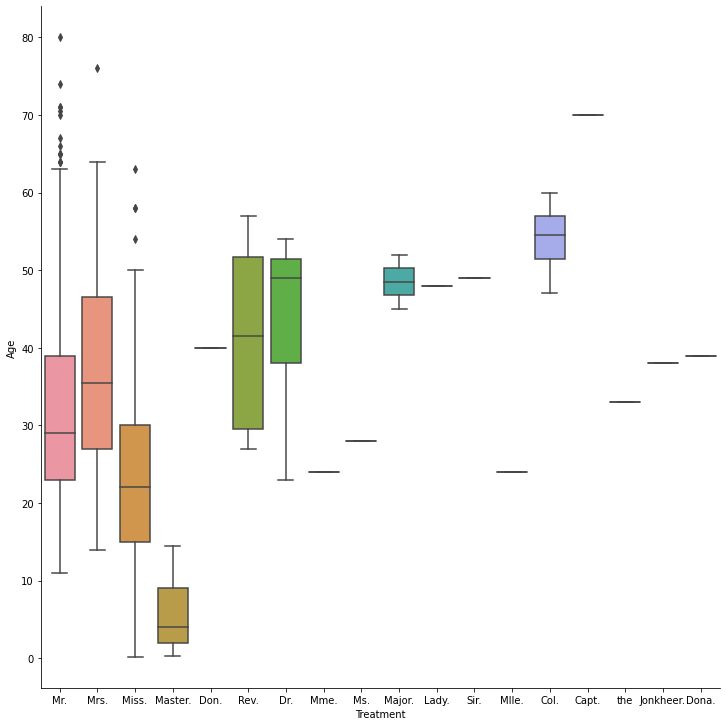

In [69]:
treatment = []
for my_string in data['Name']:
  res = my_string.split(',', maxsplit=1)[-1]\
                .split(maxsplit=1)[0]
  treatment.append(res)
data['Treatment'] = treatment
# data.head(20)
count_treatment = data[['Name', 'Treatment']].groupby('Treatment').count()
age_treatment = data[['Age', 'Treatment']].groupby('Treatment').median()

pd.concat([count_treatment, age_treatment], axis='columns')
sns.catplot(kind='box', y='Age', x='Treatment', data=data, height=10, aspect=1)

Para diminuir algumas variáveis de tratamento vamos realizar o seguinte agrupamento em uma nova coluna no DataFrame de modo o obter o novo gráfico de boxplot

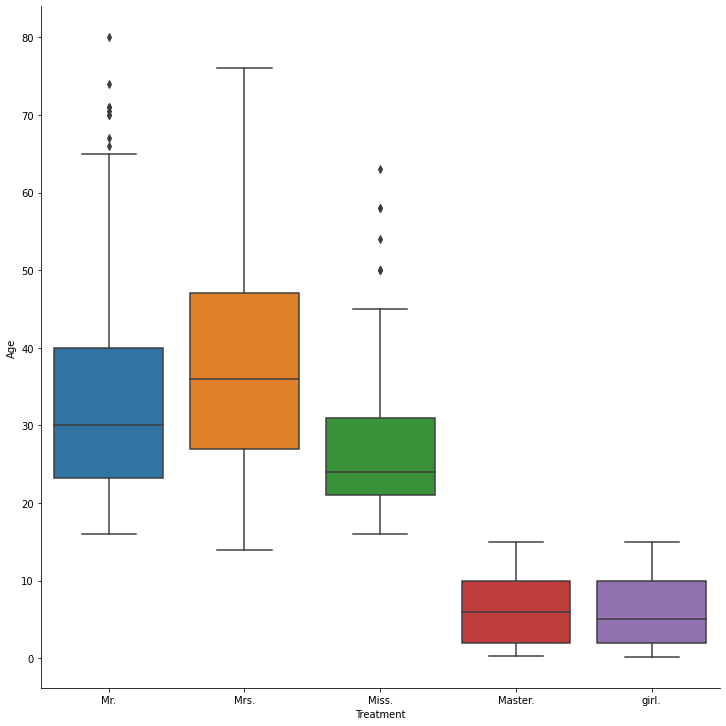

In [70]:
data.loc[(data['Treatment'] == "Capt.") , "Treatment"] = "Mr."
data.loc[(data['Treatment'] == "Don.") , "Treatment"] = "Mr."
data.loc[(data['Treatment'] == "Col.") , "Treatment"] = "Mr."
data.loc[(data['Treatment'] == "Dona.") , "Treatment"] = "Mrs."
data.loc[(data['Treatment'] == "Dr.") & (data['Sex'] == "male"), "Treatment"] = "Mr."
data.loc[(data['Treatment'] == "Dr.") & (data['Sex'] == "female"), "Treatment"] = "Mrs."

data.loc[(data['Treatment'] == "Jonkheer.") , "Treatment"] = "Mr."
data.loc[(data['Treatment'] == "Lady.") , "Treatment"] = "Mrs."

data.loc[(data['Treatment'] == "Major.") , "Treatment"] = "Mr."

data.loc[(data['Treatment'] == "Mlle.") , "Treatment"] = "Miss."
data.loc[(data['Treatment'] == "Mme.") , "Treatment"] = "Miss."
data.loc[(data['Treatment'] == "Ms.") , "Treatment"] = "Miss."

data.loc[(data['Treatment'] == "Rev.") , "Treatment"] = "Mr."
data.loc[(data['Treatment'] == "Sir.") , "Treatment"] = "Mr."

data.loc[(data['Treatment'] == "the") , "Treatment"] = "Miss."

data.loc[(data['Treatment'] == "Miss.") & (data['Age'] <= 15), 'Treatment' ] = 'girl.' 
data.loc[(data['Treatment'] == "Mr.") & (data['Age'] <= 15), 'Treatment' ] = 'Master.' 
sex_treatment = data[['Sex', 'Treatment']].groupby(['Treatment', 'Sex']).size()
sex_treatment
sns.catplot(kind='box', y='Age', x='Treatment', data=data, height=10, aspect=1)

A seguir obtemos também o valor da média e da mediana para a variável Age agrupada pelo variável Treatment, 

In [71]:
count_treatment = data[['Name', 'Treatment']].groupby('Treatment').count()
age_treatment = data[['Age', 'Treatment']].groupby('Treatment').mean()
age_treatment2 = data[['Age', 'Treatment']].groupby('Treatment').median()

sex_treatment = data[['Sex', 'Treatment']].groupby(['Treatment']).first()
pd.concat([count_treatment, age_treatment, age_treatment2, sex_treatment], axis='columns')

,Name,Age,Age,Sex
Treatment,,,,
Master.,67,6.314915,6.0,male
Miss.,212,27.015528,24.0,female
Mr.,776,32.975793,30.0,male
Mrs.,200,37.138728,36.0,female
girl.,54,6.594259,5.0,female


Como ambas são semelhantes, vamos utilizar a variável median para preencher os valores nulos nas idades do DataFrame. Após essa manipulação temos o plot do novo boxplot de Age agrupado por Treatment,

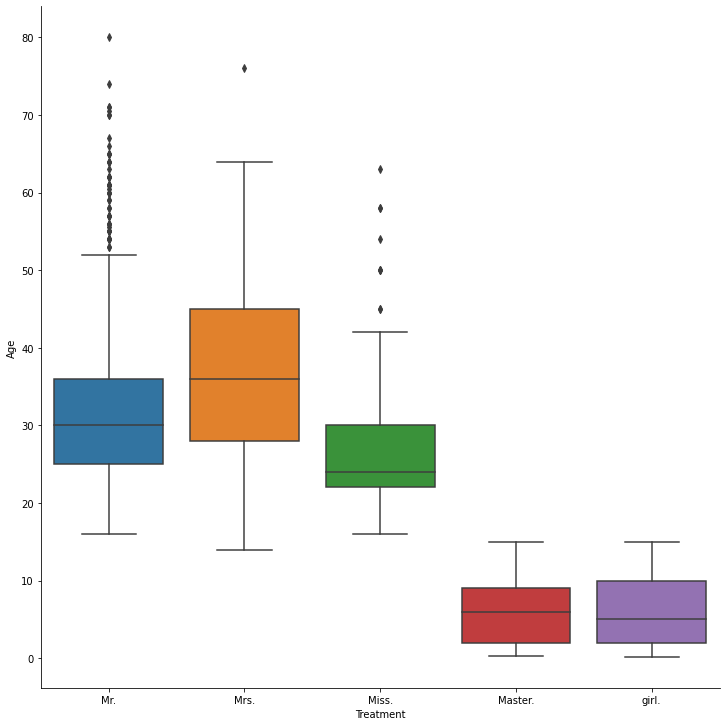

In [72]:
data.loc[(data['Treatment'] == "Col.") & (data['Age'].isnull()), "Age"] = data.loc[data['Treatment'] == "Col.", "Age"].median()
data.loc[(data['Treatment'] == "Master.") & (data['Age'].isnull()), "Age"] = data.loc[data['Treatment'] == "Master.", "Age"].median()
data.loc[(data['Treatment'] == "Miss.") & (data['Age'].isnull()), "Age"] = data.loc[data['Treatment'] == "Miss.", "Age"].median()
data.loc[(data['Treatment'] == "Mr.") & (data['Age'].isnull()), "Age"] = data.loc[data['Treatment'] == "Mr.", "Age"].median()
data.loc[(data['Treatment'] == "Mrs.") & (data['Age'].isnull()), "Age"] = data.loc[data['Treatment'] == "Mrs.", "Age"].median()
sns.catplot(kind='box', y='Age', x='Treatment', data=data, height=10, aspect=1)

In [73]:
# data.loc[(data['Treatment'] == "Col.") , "Age"] = data.loc[data['Treatment'] == "Col.", "Age"].median()
# data.loc[(data['Treatment'] == "Master.") , "Age"] = data.loc[data['Treatment'] == "Master.", "Age"].median()
# data.loc[(data['Treatment'] == "Miss.") , "Age"] = data.loc[data['Treatment'] == "Miss.", "Age"].median()
# data.loc[(data['Treatment'] == "Mr.") , "Age"] = data.loc[data['Treatment'] == "Mr.", "Age"].median()
# data.loc[(data['Treatment'] == "Mrs.") , "Age"] = data.loc[data['Treatment'] == "Mrs.", "Age"].median()
# data.loc[(data['Treatment'] == "girl.") , "Age"] = data.loc[data['Treatment'] == "girl.", "Age"].median()

In [74]:
data.loc[data['Embarked'].isnull() , "Embarked"] = "S"


In [75]:
fare=data.loc[(data['Fare'].isnull()) ] 
data.loc[data['Fare'].isnull() , "Fare"] = 13.3
# fare
data.loc[(data['Fare'].isnull()) ] 

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Treatment


In [76]:
# data.loc[(data['Pclass'] == 3) , "Fare"] = data.loc[data['Pclass'] == 3, "Fare"].median()
# data.loc[(data['Pclass'] == 2) , "Fare"] = data.loc[data['Pclass'] == 2, "Fare"].median()
# data.loc[(data['Pclass'] == 1) , "Fare"] = data.loc[data['Pclass'] == 1, "Fare"].median()

In [77]:
data['Family'] = data['SibSp'] +  data['Parch'] 
# data.drop(['SibSp', 'Parch'], axis='columns', inplace=True)

data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Treatment,Family
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr.,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs.,1
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss.,0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs.,1
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr.,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,30.0,0,0,A.5. 3236,8.0500,NaN,S,Mr.,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,Mrs.,0
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Mr.,0
416,1308,3,"Ware, Mr. Frederick",male,30.0,0,0,359309,8.0500,NaN,S,Mr.,0


In [78]:
data.isnull().mean()

PassengerId    0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.000000
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.774637
Embarked       0.000000
Treatment      0.000000
Family         0.000000
dtype: float64

#DESCRIÇÃO DOS DADOS

Nessa etapa vamos descrever os dados para conseguir entender e obter análises quantitativas do dataframe. Essa descrição é realizada diante da distribuição dos valores das variáveis e da correlação dos dados.


##Distribuição

A seguir são realizadas diversas plotagens con o método catplot para conseguir visualizar o contexto dos passageiros em diverentes aspects.

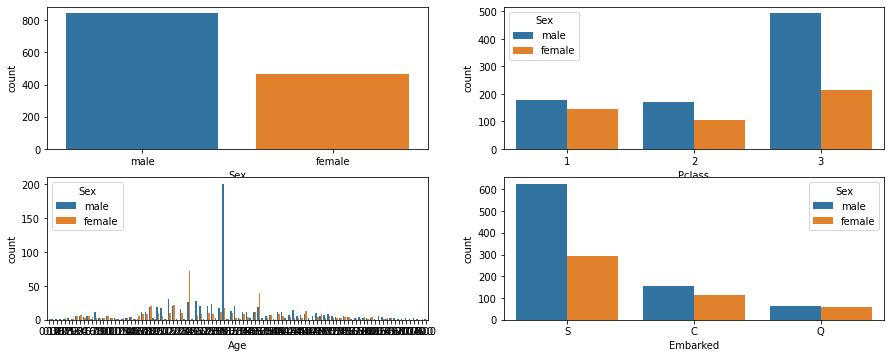

In [79]:
fig, axes = plt.subplots(2, 2, figsize=(15, 3))
fig.subplots_adjust( bottom=0.05, top=1.5)

sns.countplot(x=data.Sex, ax=axes[0, 0])
sns.countplot(x=data.Pclass,hue=data.Sex,ax=axes[0, 1])

sns.countplot(x=data.Age,hue=data.Sex,ax=axes[1, 0])
sns.countplot(x=data.Embarked,hue=data.Sex,ax=axes[1, 1])


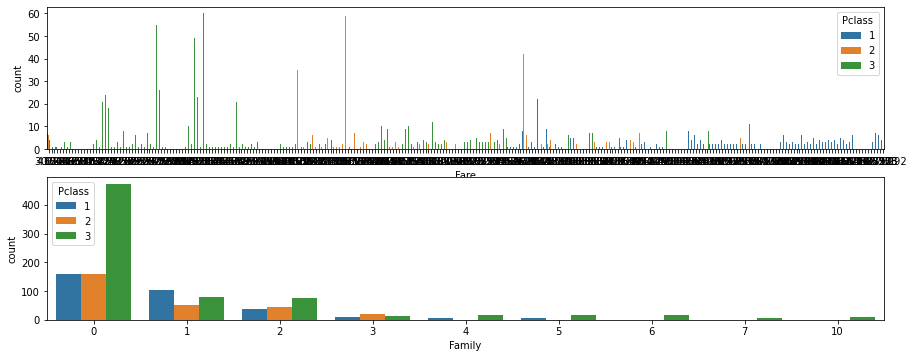

In [80]:
fig, axes = plt.subplots(2, figsize=(15, 3))
fig.subplots_adjust( bottom=0.05, top=1.5)

sns.countplot(x=data.Fare,hue=data.Pclass, ax=axes[0])
sns.countplot(x=data.Family,hue=data.Pclass,ax=axes[1])

In [81]:
# data.loc[(data['Treatment'] == "Miss.") & (data['SibSp'] == 0)] 


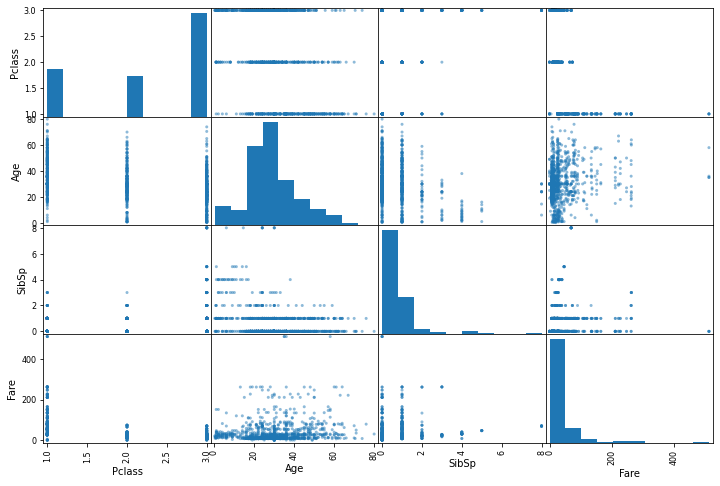

In [82]:
scatter_matrix (data[['Pclass', 'Sex', 'Age','SibSp',  'Fare']], figsize = ( 12 , 8 ));

#MACHINE LEARNING

##Preparação dos dados

In [ ]:
data['Embarked_S'] = data['Embarked'].map({'S': 1, 'C': 0, 'Q': 0})
data['Embarked_C'] = data['Embarked'].map({'S': 0, 'C': 1, 'Q': 0})
data['Embarked_Q'] = data['Embarked'].map({'S': 0, 'C': 0, 'Q': 1})
data['adultW'] = data['Treatment'].map({'girl.': 0, 'Master.': 0, 'Mrs.': 1, 'Miss.': 1, 'Mr.': 0})
data['adultM'] = data['Treatment'].map({'girl.': 0, 'Master.': 0, 'Mrs.': 0, 'Miss.': 0, 'Mr.': 1})
data['kid'] = data['Treatment'].map({'girl.': 1, 'Master.': 1, 'Mrs.': 0, 'Miss.': 0, 'Mr.': 0})
data.drop(['Embarked', 'Treatment', 'Lastname', 'Ticket', 'Cabin', 'Name'], axis='columns', inplace=True)
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})

data

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_S,Embarked_C,Embarked_Q,adultW,adultM,kid
0,1,3,0,30.0,1,0,8.05,1,0,0,0,1,0
1,2,1,1,36.0,1,0,60.00,0,1,0,1,0,0
2,3,3,1,24.0,0,0,8.05,1,0,0,1,0,0
3,4,1,1,36.0,1,0,60.00,1,0,0,1,0,0
4,5,3,0,30.0,0,0,8.05,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,0,30.0,0,0,8.05,1,0,0,0,1,0
414,1306,1,1,36.0,0,0,60.00,0,1,0,1,0,0
415,1307,3,0,30.0,0,0,8.05,1,0,0,0,1,0
416,1308,3,0,30.0,0,0,8.05,1,0,0,0,1,0


In [ ]:
data.drop(['PassengerId'], axis='columns', inplace=True)

train = data.iloc[:train_lines]
test = data.iloc[train_lines:]
train.shape

(891, 11)

com base nos modelos de predição aplicados em https://github.com/rafaelnduarte/Titanic_Kaggle/blob/master/Titanic_Logistic_Regression_Decision_Tree.ipynb





In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state = 42)

In [ ]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(train, survived)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, train, survived, cv=3, scoring='accuracy')

array([0.62962963, 0.76094276, 0.67003367])

In [ ]:
forest_clf.fit(train, survived)

y_pred_forest = forest_clf.predict(test)

In [ ]:
passengerId = test['PassengerId']

submission = pd.DataFrame({
    "PassengerId": passengerId,
    "Survived": y_pred_forest
})

# Generating csv file
from google.colab import files

submission.to_csv('submission_forest.csv', index=False)
files.download('submission_forest.csv')

In [ ]:
lr_model = LogisticRegression(solver='liblinear')
lr_model.fit(train, survived)

# Checking the accuracy of the model
acc_logReg = round(lr_model.score(train, survived) * 100, 2)
print("Logistic Regression Model Accuracy: {}".format(acc_logReg))

Logistic Regression Model Accuracy: 82.49


In [ ]:
passengerId = test['PassengerId']


In [ ]:
y_pred_lr = lr_model.predict(test)

submission = pd.DataFrame({
    "PassengerId": passengerId,
    "Survived": y_pred_lr
})

# Generating csv file
from google.colab import files

submission.to_csv('submission_lr.csv', index=False)
files.download('submission_lr.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:

# Creating a Decision Tree model
tree_model = DecisionTreeClassifier(max_depth=3)
tree_model.fit(train, survived)

# Checking the accuracy of the model
acc_tree = round(tree_model.score(train, survived) * 100, 2)
print("Decision Tree Model Accuracy: {}".format(acc_tree))

Decision Tree Model Accuracy: 83.28


In [ ]:
y_pred_tree = tree_model.predict(test)

submission = pd.DataFrame({
    "PassengerId": passengerId,
    "Survived": y_pred_tree
})

# generating csv file
submission.to_csv('submission_tree.csv', index=False)
files.download('submission_tree.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
gender = pd.read_csv('gender_submission.csv')
from sklearn.metrics import mean_absolute_error
erro = mean_absolute_error(y_pred_tree,gender.Survived)
erro 

0.2607655502392344